## Grupo 41 - Trabajo Practico N◦ 2: Contenido nutricional de la Canasta Basica.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

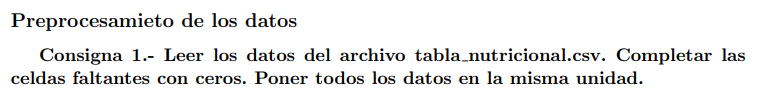

In [2]:
df = pd.read_csv("tabla_nutricional.csv", sep =';')

In [3]:
#Cambiemos los valores nan(nulo) por 0
#Pasemos los valores de MG a GR
df.fillna(0, inplace=True)
columna_mg = ['Na (mg)', 'Ca (mg)', 'Fe (mg)']
df[columna_mg] = df[columna_mg] / 1000
df.rename(columns={'Na (mg)': 'Na (gr)'}, inplace=True)
df.rename(columns={'Ca (mg)': 'Ca (gr)'}, inplace=True)
df.rename(columns={'Fe (mg)': 'Fe (gr)'}, inplace=True)
df

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.00,12.420,8.370,7.830,0.153900,0.28350,0.000189,0.00,4.990,2.190,0.520,0.00
1,Leche entera en polvo,11.00,4.510,2.840,2.730,0.044440,0.09900,0.000060,0.00,1.620,0.770,0.060,0.00
2,Yogurt,19.00,2.450,0.510,0.490,0.007990,0.01767,0.000005,0.00,0.320,0.140,0.014,0.00
3,Queso crema,1.66,0.060,0.100,0.370,0.001230,0.00093,0.000000,0.00,0.360,0.110,0.010,0.00
4,Queso cuartirolo,3.66,0.060,0.770,0.800,0.020840,0.01654,0.000000,0.00,0.760,0.210,0.020,0.00
5,Queso rallar,1.66,0.060,0.550,0.450,0.020420,0.01578,0.000000,0.00,0.360,0.110,0.008,0.00
6,Huevo,16.00,0.000,1.920,1.890,0.021600,0.00896,0.000400,0.00,0.510,0.720,0.460,0.00
7,Asado,50.00,0.000,9.300,7.500,0.033000,0.00750,0.001120,0.00,2.930,3.270,0.189,0.00
8,Paleta,15.00,0.000,3.000,1.500,0.009900,0.00180,0.000340,0.00,0.880,0.980,0.056,0.00
9,Hueso c/carne,15.00,0.000,3.000,1.500,0.009900,0.00180,0.000340,0.00,0.880,0.980,0.056,0.00


In [4]:
#Para corroborar los de los nulos
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alimento              57 non-null     object 
 1   Cantidad (gr/ml)      57 non-null     float64
 2   HC (gr)               57 non-null     float64
 3   Proteinas (gr)        57 non-null     float64
 4   Grasas (gr)           57 non-null     float64
 5   Na (gr)               57 non-null     float64
 6   Ca (gr)               57 non-null     float64
 7   Fe (gr)               57 non-null     float64
 8   Azucares Libres (gr)  57 non-null     float64
 9   AGS (gr)              57 non-null     float64
 10  AGNI (gr)             57 non-null     float64
 11  AG p (gr)             57 non-null     float64
 12  Fibra (gr)            57 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.9+ KB


 1) Cambiamos los valores null(NaN) por 0
 2) Modificamos los valores que estaba en MG a GR
 3) Revisamos que todo esté en orden



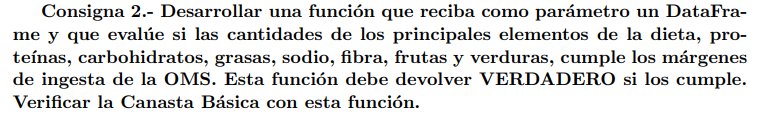


In [5]:

#Identifico a las Frutas y verduras de mi df
frutasYVerduras = ["Manzana", "Naranja", "Mandarina", "pera", "Banana", "Acelga", "Zanahoria", "Tomate", "Lechuga", "Cebolla", "Zapallo", "Papa", "Batata", "Arvejas en lata", "Tomate envasado"]

def indiceFrutYVerd(dataFrame): #separo los indices de todas las frutas y verduras
    n = 0
    res = []
    for i in dataFrame["Alimento"]:
        if i in frutasYVerduras:
            res.append(n)
        n += 1
    return res

In [6]:
def diccionarioCantidades(dataFrame): #meto la sumas de cada columna en un diccionario para poder operar más fácilmente
    d = {}
    for i in dataFrame.columns:
        if i != "Alimento":
            d[i] = sum(dataFrame[i])
    frutasCantidad = []
    for i in indiceFrutYVerd(dataFrame):
        frutasCantidad.append(dataFrame['Cantidad (gr/ml)'][i])
    d["Frutas y verduras"] = sum(frutasCantidad)
    return d

In [7]:
def comidaSana(d): #compruebo que cada categoría cumpla con las metas establecidas
    d = diccionarioCantidades(d)
    puntaje = 0
    if d['Grasas (gr)']*100/d['Cantidad (gr/ml)'] > 15: 
        if d['Grasas (gr)']*100/d['Cantidad (gr/ml)'] < 30:
            res = "adecuado"
            puntaje += 1
        else: 
            res = "excesivo"
    else:
        res = "insuficiente"
    print (f"hay un {round(d['Grasas (gr)']*100/d['Cantidad (gr/ml)'],2)}% de grasas lo cual es {res}")
    
    if d['Proteinas (gr)']*100/d['Cantidad (gr/ml)'] > 10: 
        if d['Proteinas (gr)']*100/d['Cantidad (gr/ml)'] < 15:
            res = "adecuado"
            puntaje += 1
        else: 
            res = "excesivo"
    else:
        res = "insuficiente"
    print (f"hay un {round(d['Proteinas (gr)']*100/d['Cantidad (gr/ml)'],2)}% de proteínas lo cual es {res}")
    
    if d['Na (gr)'] > 1.5: 
        if d['Na (gr)'] < 2.5:
            res = "adecuado"
            puntaje += 1
        else: 
            res = "excesivo"
    else:
        res = "insuficiente"
    print (f"hay {round(d['Na (gr)'],2)} gramos de sodio lo cual es {res}")
    
    if d['HC (gr)']*100/d['Cantidad (gr/ml)'] > 55: 
        if d['HC (gr)']*100/d['Cantidad (gr/ml)'] < 75:
            res = "adecuado"
            puntaje += 1
        else: 
            res = "excesivo"
    else:
        res = "insuficiente" 
    print (f"hay un {round(d['HC (gr)']*100/d['Cantidad (gr/ml)'],2)}% de carbohidratos lo cual es {res}")
    
    if d['Azucares Libres (gr)']*100/d['Cantidad (gr/ml)'] < 10: 
        res = "adecuado"
        puntaje += 1
    else:  
        res = "excesivo"
    print (f"hay un {round(d['Azucares Libres (gr)']*100/d['Cantidad (gr/ml)'],2)}% de azucares libres lo cual es {res}")
    
    if d["Fibra (gr)"] > 25:
        res = "adecuado"
        puntaje += 1
    else:
        res = "insuficiente"
    print (f"hay {round(d['Fibra (gr)'],2)} gramos de Fibra lo cual es {res}")
    
    if d["Frutas y verduras"] >= 400:
        res = "adecuado"
        puntaje += 1
    else: 
        res = "insuficiente"
    print (f"hay {round(d['Frutas y verduras'],2)} gramos de Fruta y verdura lo cual es {res}")

    res = False
    if puntaje == 7:
        res = True
    return print(f"Despues de evaluar si cumple los margenes de la ingesta de OMS la respuesta es: {res}")

comidaSana(df)

hay un 4.05% de grasas lo cual es insuficiente
hay un 5.92% de proteínas lo cual es insuficiente
hay 3.34 gramos de sodio lo cual es excesivo
hay un 21.61% de carbohidratos lo cual es insuficiente
hay un 2.99% de azucares libres lo cual es adecuado
hay 21.26 gramos de Fibra lo cual es insuficiente
hay 665.0 gramos de Fruta y verdura lo cual es adecuado
Despues de evaluar si cumple los margenes de la ingesta de OMS la respuesta es: False


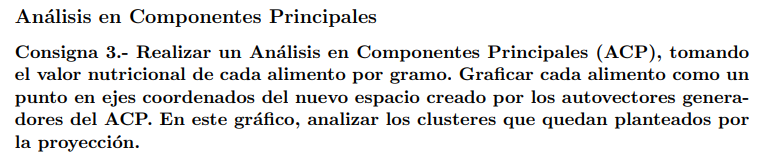

In [8]:
import warnings
warnings.filterwarnings("ignore")

cantidades = []
for cantidad in df["Cantidad (gr/ml)"]:
    cantidades.append(cantidad)
df_ajustado = df.copy()
for columna in range(2,len(df_ajustado.columns)):
    for i in range(len(df_ajustado[df_ajustado.columns[columna]])):
        df_ajustado[df_ajustado.columns[columna]][i] = df_ajustado[df_ajustado.columns[columna]][i]/cantidades[i]

In [9]:
#Utilizo y modifico la funcion vista en clase para que sea apropiada a mis datos(En clase los datos estaban Transpuesto)

def calculoACP(data):
    d, n = data.shape
    m=np.mean(data, axis=0)
    X = data - m
    Mcov = np.dot(X.T,X) / n 
    D, V = np.linalg.eigh(Mcov)
    # ordenamos los autovalores de mayor a menor
    idx = np.argsort (- D )
    D = D[idx]
    V = V[:, idx]

    return D, V, X, m

In [10]:


valores_nutricionales = df_ajustado[['HC (gr)', 'Proteinas (gr)', 'Grasas (gr)', 
                            'Na (gr)', 'Ca (gr)', "Fe (gr)","Azucares Libres (gr)",
                            "AGS (gr)","AGNI (gr)","AG p (gr)","Fibra (gr)"]].values


In [11]:
D, V, X, m = calculoACP(valores_nutricionales)

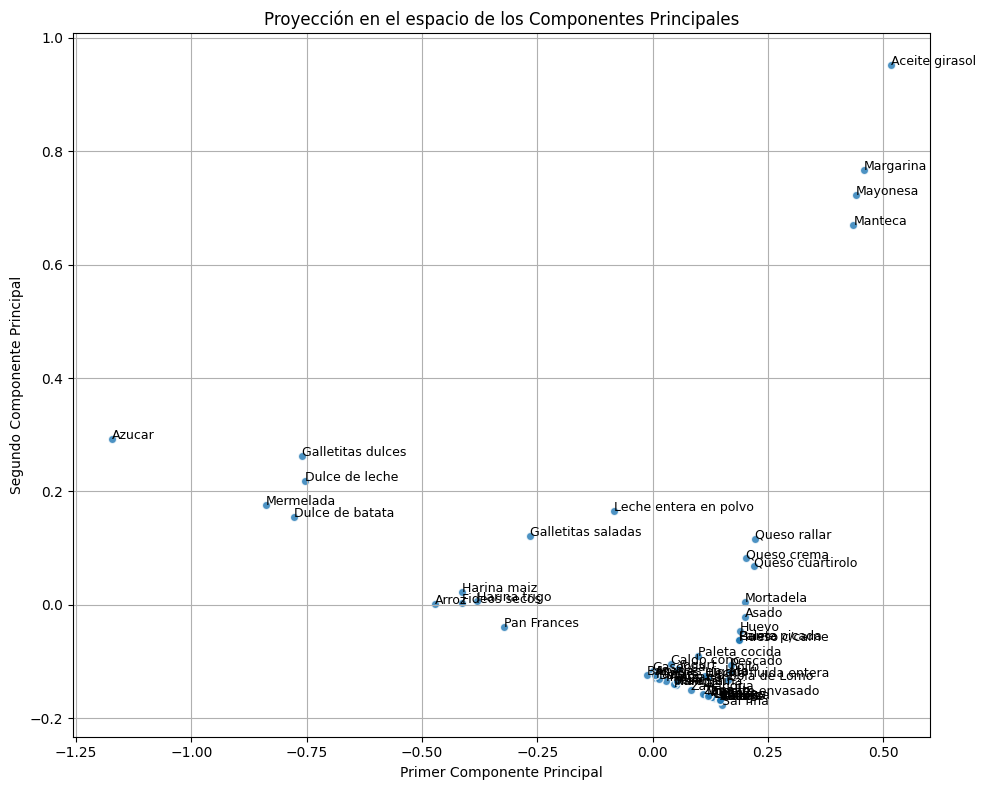

In [12]:
# Creamos la figura y los ejes
X_pca = np.dot( X,V[:, :3]) 

plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

# Graficamos los datos proyectados en las dos primeras componentes principales
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, edgecolors='w')

# Etiquetamos cada punto con el nombre del alimento
for i, alimento in enumerate(df['Alimento']):
    ax.text(X_pca[i, 0], X_pca[i, 1], alimento, fontsize=9)

# Añadimos etiquetas a los ejes y título
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('Proyección en el espacio de los Componentes Principales')
ax.grid(True)
plt.tight_layout()
plt.show()

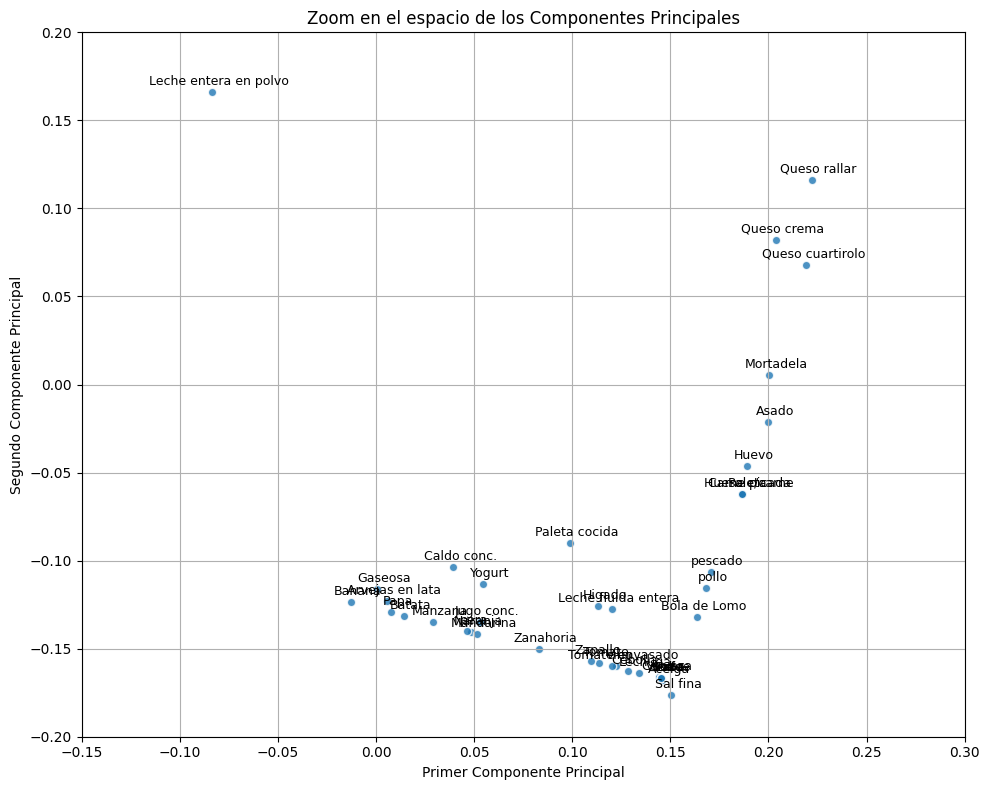

In [13]:
#Realizamos zoom al grafico para entender más el funcionamiento de los Clusters

X_pca = np.dot( X,V[:, :3]) 

# Se filtran los puntos que están dentro del rango especificado
mask = (X_pca[:, 0] >= -0.2) & (X_pca[:, 0] <= 0.5) & (X_pca[:, 1] >= -0.2) & (X_pca[:, 1] <= 0.2)
X_pca_zoomed = X_pca[mask]
alimentos_zoomed = df[mask]['Alimento'].tolist()  # Obtener los nombres de los alimentos correspondientes


plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

# Graficamos los datos proyectados dentro del rango especificado
ax.scatter(X_pca_zoomed[:, 0], X_pca_zoomed[:, 1], alpha=0.8, edgecolors='w')

# Etiquetamos cada punto con el nombre del alimento correspondiente
for i, alimento in enumerate(alimentos_zoomed):
    x = X_pca_zoomed[i, 0]
    y = X_pca_zoomed[i, 1]
    ax.annotate(alimento, (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=9)

# Ajustamos los límites de los ejes para el zoom
ax.set_xlim(-0.15, 0.3)
ax.set_ylim(-0.2, 0.2)
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('Zoom en el espacio de los Componentes Principales')
ax.grid(True)
plt.tight_layout()
plt.show()

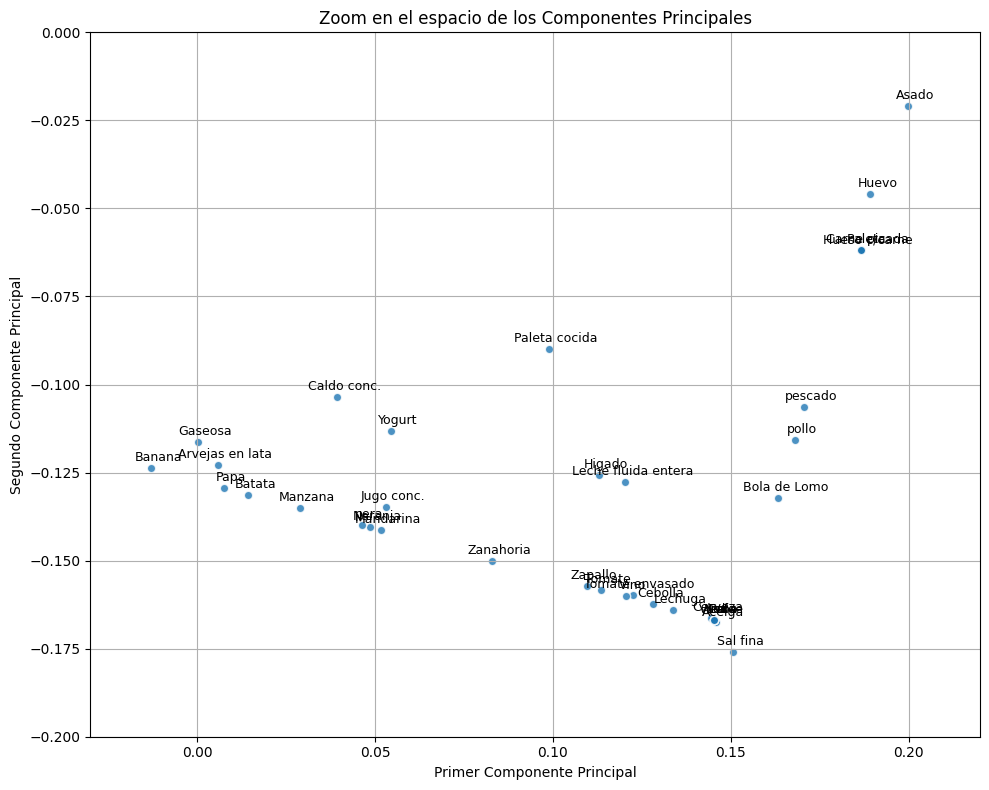

In [14]:
X_pca = np.dot( X,V[:, :3]) 
mask = (X_pca[:, 0] >= -0.2) & (X_pca[:, 0] <= 0.5) & (X_pca[:, 1] >= -0.2) & (X_pca[:, 1] <= 0.2)
X_pca_zoomed = X_pca[mask]
alimentos_zoomed = df[mask]['Alimento'].tolist()  
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
ax.scatter(X_pca_zoomed[:, 0], X_pca_zoomed[:, 1], alpha=0.8, edgecolors='w')
for i, alimento in enumerate(alimentos_zoomed):
    x = X_pca_zoomed[i, 0]
    y = X_pca_zoomed[i, 1]
    ax.annotate(alimento, (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=9)
ax.set_xlim(-0.03, 0.22)
ax.set_ylim(-0.2, 0)
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('Zoom en el espacio de los Componentes Principales')
ax.grid(True) 
plt.tight_layout()
plt.show()

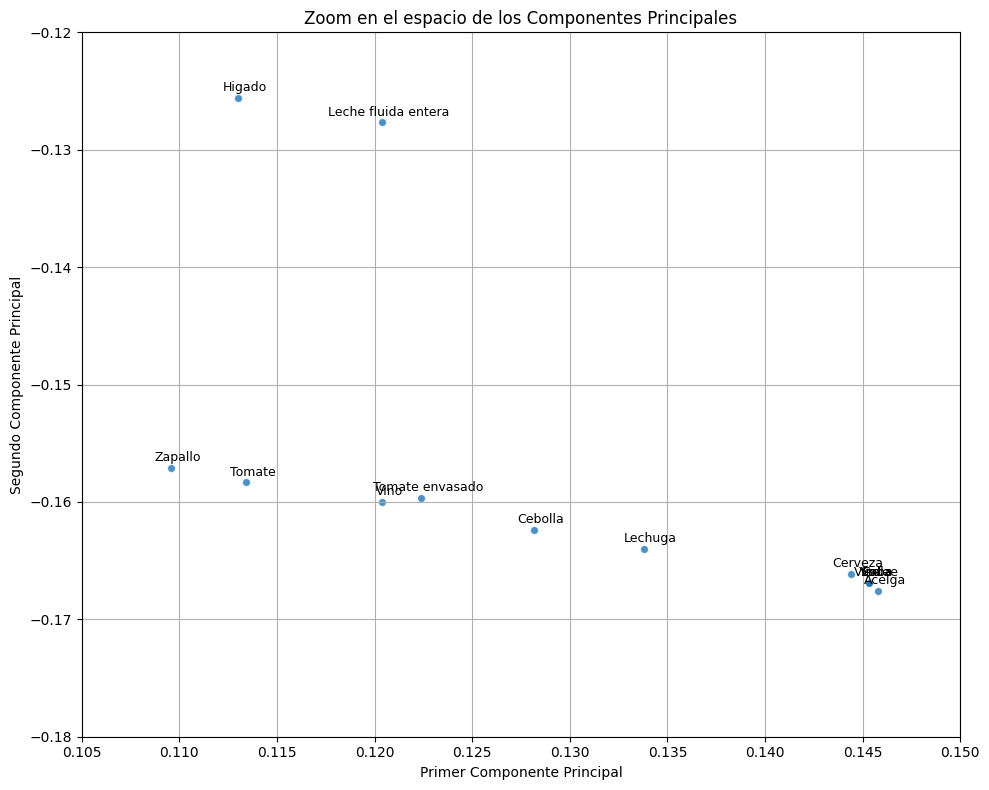

In [15]:
X_pca = np.dot( X,V[:, :3]) 
mask = (X_pca[:, 0] >= -0.2) & (X_pca[:, 0] <= 0.5) & (X_pca[:, 1] >= -0.2) & (X_pca[:, 1] <= 0.2)
X_pca_zoomed = X_pca[mask]
alimentos_zoomed = df[mask]['Alimento'].tolist()  
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
ax.scatter(X_pca_zoomed[:, 0], X_pca_zoomed[:, 1], alpha=0.8, edgecolors='w')
for i, alimento in enumerate(alimentos_zoomed):
    x = X_pca_zoomed[i, 0]
    y = X_pca_zoomed[i, 1]
    ax.annotate(alimento, (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=9)
ax.set_xlim(0.105, 0.15)
ax.set_ylim(-0.18, -0.12)
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('Zoom en el espacio de los Componentes Principales')
ax.grid(True)
plt.tight_layout()
plt.show()

## Proceso de Análisis con ACP

1. **Modificación del DataFrame:**
   - Realizo modificación haciendo un DataFrame ajustado que tome el valor nutricional de cada alimento por gramo.
2. **Aplicación de ACP:**
   - Usando la función ACP adaptada para el orden de mi DataFrame en los valores nutricionales.
3. **Obtención de Autovalores y Autovectores:**
   - Obtengo autovalores, autovectores (de mayor a menor), matriz de datos centrada y la media (promedio) de cada fila del DataFrame.
4. **Proyección en el Espacio:**
   - Tomo 3 componentes principales para realizar una proyección en el espacio y obtener un 85% aproximado de la información.
   - Se decidio graficar en 2D por la simplicidad de la lectura
y permite ver cómo se agrupan los datos que explican la mayor parte de la variabilidad.
    
    - Una forma de ver la variabiblidad explicada graficamente es analizando sus componente
    autovalores(que estan en la matriz D) 

    - D: Son los autovalores de la matriz de covarianza, que representan la cantidad de varianza explicada por cada 
    componente principal.

    - np.sum(D): Calcula la suma total de todos los autovalores, que representa la varianza total en los datos.

    - D / np.sum(D): Divide cada autovalor por la suma total de autovalores para obtener la proporción de varianza 
    explicada por cada componente principal.



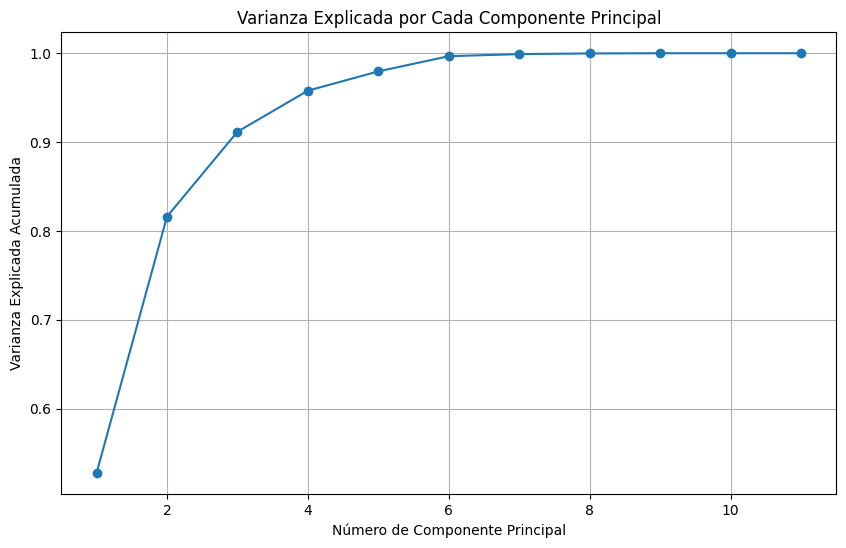

In [16]:
# Calcular la varianza explicada por cada componente principal
varianza_explicada = D / np.sum(D)

# Graficar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(varianza_explicada) + 1), np.cumsum(varianza_explicada), marker='o')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.grid(True)
plt.show()


   - Se puede observar que solo tomando ya 3 autovectores aproximandamente llega a un pico alto de la informacion(85-90%)
5. **Análisis de Clústeres:**
   - Se puede observar un clúster de dulces junto a azúcar, galletitas, dulces y mermelada.
   - Lo mismo para los compuestos de aceite, margarina, mayonesa y manteca.
   - Harina de trigo, arroz, pan francés, y galletas saladas.
   - Los quesos tienen su propio clúster con cierta lejanía.
   - Luego, los datos se van diferenciando menos, aunque si uno puede realizar zoom, va a ver similitudes.
   - Entre ciertas carnes: pescado, pollo, bola de lomo, hígado, paleta cocida y la leche, en este caso también anda cerca debido a sus valores nutricionales.
   - Las verduras también se juntan, se puede notar que es muy parecido nutricionalmente el tomate y el tomate envasado (referido al zoom que se ve zapallo, tomate, tomate envasado, cebolla y lechuga).
   - Los demás clústeres que quedan son debido a similitudes en valores nutricionales ajustados, también hay que tener en cuenta los valores nulos que se volvieron 0 que llegan a afectar en el cálculo del ACP.


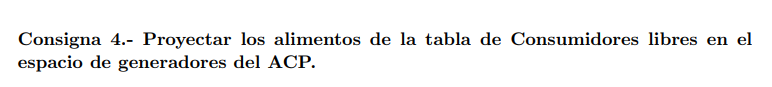

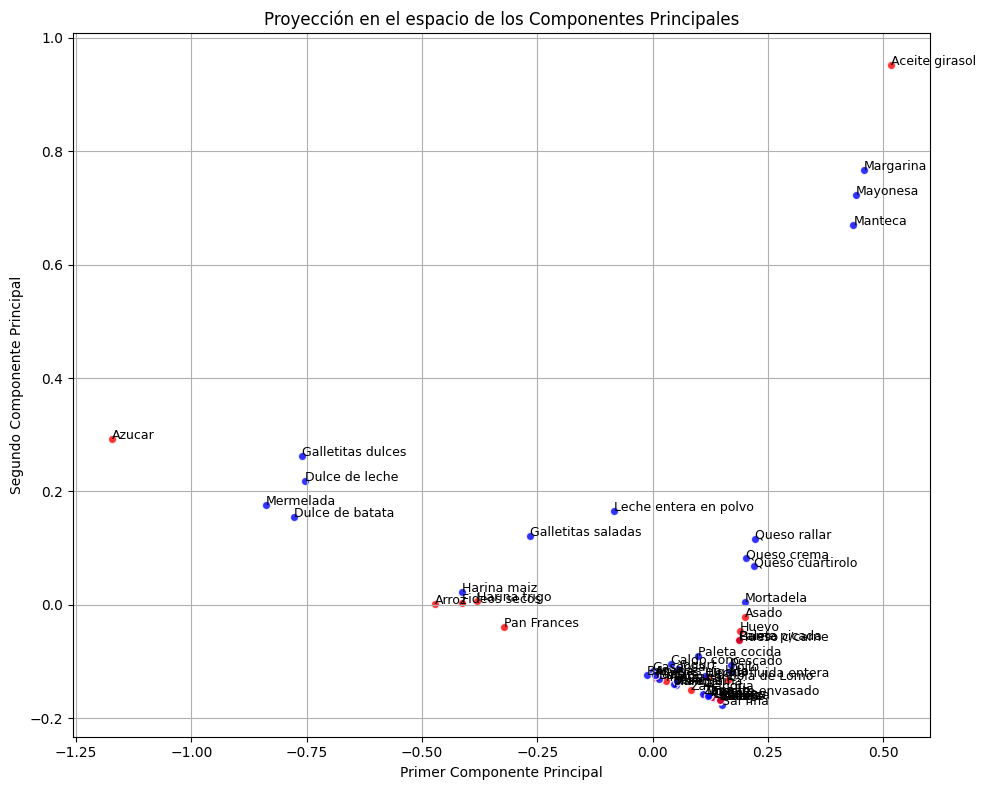

In [17]:
#Hago una lista con los alimentos de consumidores libres para remarcar con el color rojo, no todos llevan el mismo nombre, pero se
#sabe que es el mismo alimento.

D, V, X, m = calculoACP(valores_nutricionales)
# Lista de alimentos seleccionados
alimentos_tabla_con_li = ["Aceite girasol", "Arroz", "Azucar", "Fideos secos", "Harina trigo",
                          "Huevo", "Pan Frances", "Leche fluida entera", "Yerba", "Zanahoria",
                          "Tomate", "Cebolla", "Papa", "Acelga", "Naranja", "Manzana", 'Bola de Lomo',
                          'Asado', 'Paleta ', 'Carne picada']

X_pca = np.dot(X, V[:, :3]) 
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
for i, alimento in enumerate(df['Alimento']):
    if alimento in alimentos_tabla_con_li:
        ax.scatter(X_pca[i, 0], X_pca[i, 1], color='red', alpha=0.8, edgecolors='w')
    else:
        ax.scatter(X_pca[i, 0], X_pca[i, 1], color='blue', alpha=0.8, edgecolors='w')
    ax.text(X_pca[i, 0], X_pca[i, 1], alimento, fontsize=9)
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('Proyección en el espacio de los Componentes Principales')
ax.grid(True)
plt.tight_layout()
plt.show()

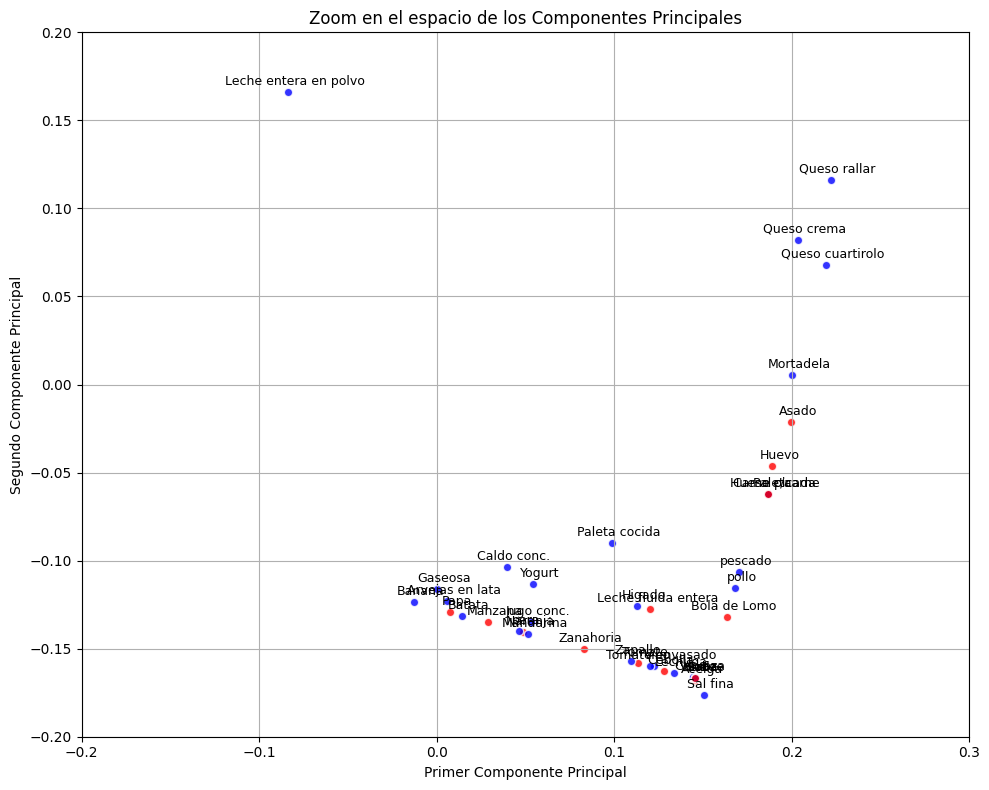

In [18]:
X_pca = np.dot(X, V[:, :3]) 
mask = (X_pca[:, 0] >= -0.2) & (X_pca[:, 0] <= 0.5) & (X_pca[:, 1] >= -0.2) & (X_pca[:, 1] <= 0.2)
X_pca_zoomed = X_pca[mask]
alimentos_zoomed = df[mask]['Alimento'].tolist() 
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
for i, alimento in enumerate(df['Alimento']):
    if alimento in alimentos_tabla_con_li and alimento in alimentos_zoomed:
        color = 'red'   
    else:
        color = 'blue'   
    if alimento in alimentos_zoomed:
        ax.scatter(X_pca[i, 0], X_pca[i, 1], color=color, alpha=0.8, edgecolors='w')
        ax.annotate(alimento, (X_pca[i, 0], X_pca[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=9)
ax.set_xlim(-0.2, 0.3)
ax.set_ylim(-0.2, 0.2)
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('Zoom en el espacio de los Componentes Principales')
ax.grid(True)
plt.tight_layout()
plt.show()

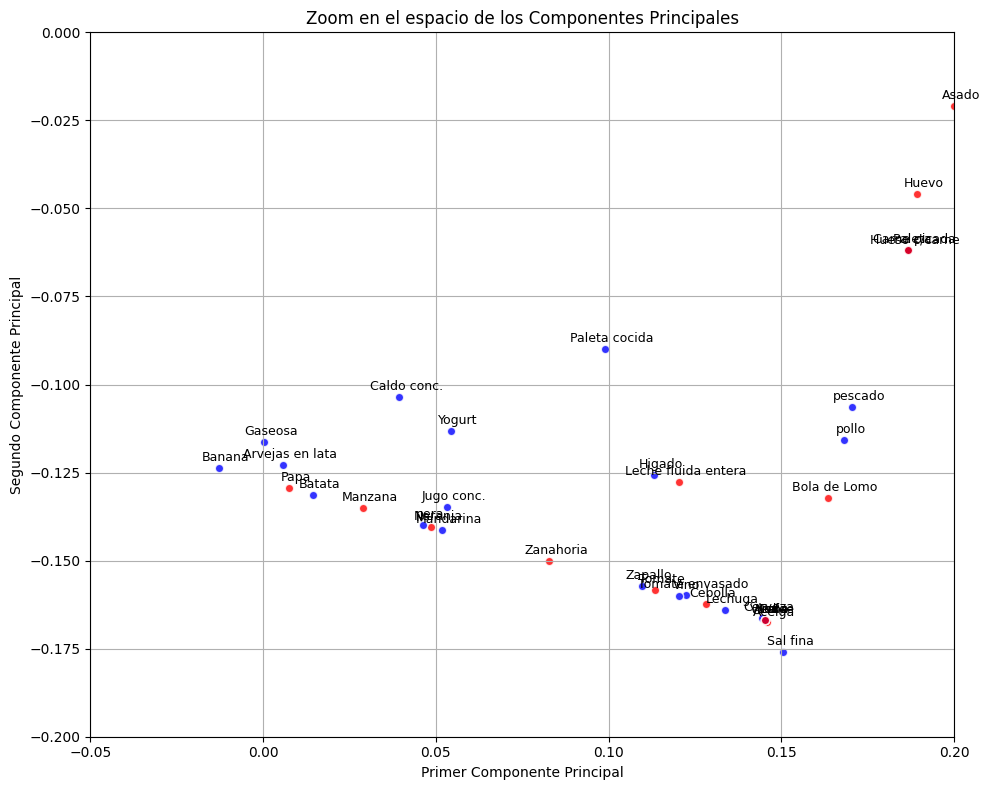

In [19]:
X_pca = np.dot(X, V[:, :3]) 

mask = (X_pca[:, 0] >= -0.2) & (X_pca[:, 0] <= 0.5) & (X_pca[:, 1] >= -0.2) & (X_pca[:, 1] <= 0.2)
X_pca_zoomed = X_pca[mask]
alimentos_zoomed = df[mask]['Alimento'].tolist()  
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
for i, alimento in enumerate(df['Alimento']):
    if alimento in alimentos_tabla_con_li and alimento in alimentos_zoomed:
        color = 'red'  
    else:
        color = 'blue'  
    if alimento in alimentos_zoomed:
        ax.scatter(X_pca[i, 0], X_pca[i, 1], color=color, alpha=0.8, edgecolors='w')
        ax.annotate(alimento, (X_pca[i, 0], X_pca[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=9)
ax.set_xlim(-0.05, 0.2)
ax.set_ylim(-0.2, 0)
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('Zoom en el espacio de los Componentes Principales')
ax.grid(True)
plt.tight_layout()
plt.show()

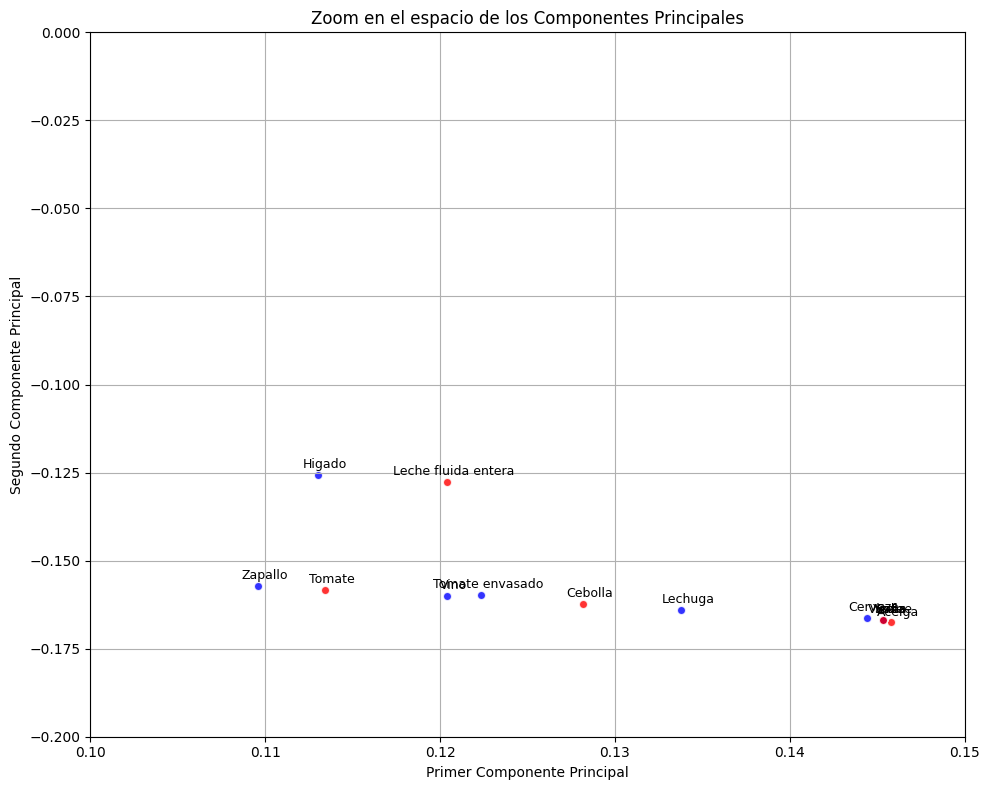

In [20]:
X_pca = np.dot(X, V[:, :3]) 
mask = (X_pca[:, 0] >= -0.2) & (X_pca[:, 0] <= 0.5) & (X_pca[:, 1] >= -0.2) & (X_pca[:, 1] <= 0.2)
X_pca_zoomed = X_pca[mask]
alimentos_zoomed = df[mask]['Alimento'].tolist()  
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
for i, alimento in enumerate(df['Alimento']):
    if alimento in alimentos_tabla_con_li and alimento in alimentos_zoomed:
        color = 'red'  
    else:
        color = 'blue' 
    if alimento in alimentos_zoomed:
        ax.scatter(X_pca[i, 0], X_pca[i, 1], color=color, alpha=0.8, edgecolors='w')
        ax.annotate(alimento, (X_pca[i, 0], X_pca[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=9)
ax.set_xlim(0.1, 0.15)
ax.set_ylim(-0.2, 0)
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('Zoom en el espacio de los Componentes Principales')
ax.grid(True)
plt.tight_layout()
plt.show()

## Proceso de Análisis

1. **Revisión del DataFrame de Consumidores Libres**
2. **Enlistar Alimentos que Intersectan con la Tabla Nutricional**
3. **Aplicar ACP al DataFrame de la Tabla Nutricional Ajustada**, viendo dónde está cada alimento de consumidores libres.
4. **Aplicar ACP por Medio de Colores para Diferenciar**
5. **Análisis:**
   - La berenjena no está en la tabla de nutrición.
   - Los alimentos de consumidores libres: La mayoría tiene su propio clúster (están en algún grupo), ya sea de verduras o carnes.


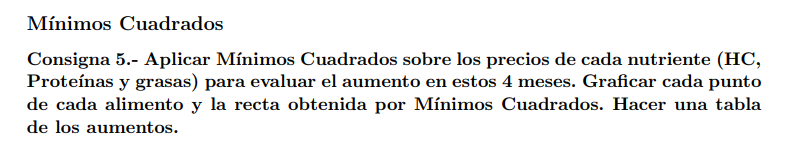



In [21]:
df_li = pd.read_csv("consumidores_libres.csv", sep =';')

In [22]:
df_li

,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0
5,HUEVOS COLOR DOCENA,720,2200.0,2600.0,3000.0,3400.0,3800.0
6,PAN FRESCO,1000,1650.0,2100.0,2200.0,2300.0,2300.0
7,LECHE c/VIT.FORT,1000,1100.0,1210.0,1620.0,1890.0,1990.0
8,YERBA TARAGUI,1000,2800.0,3700.0,4600.0,4950.0,5500.0
9,ZANAHORIAS,1000,820.0,990.0,1100.0,1100.0,1100.0


In [23]:
indiceProductos = [33, 27, 44, 30, 28, 6, 26, 0, 56, 16, 17, 19, 31, 15, 22, 21, 11, 7, 8, 10]
#creamos funciones que me devuelvan la cantidad de cada nutriente 
#que tiene cada alimento de la tabla de consumidores libres

def cantidadHC():
    res = []
    for i in indiceProductos:
        res.append(df_ajustado["HC (gr)"][i])
    return res

def cantidadProte():
    res = []
    for i in indiceProductos:
        res.append(df_ajustado["Proteinas (gr)"][i])
    return res

def cantidadGrasas():
    res = []
    for i in indiceProductos:
        res.append(df_ajustado["Grasas (gr)"][i])
    return res

In [24]:
#lo pasamos a array para poder eliminar 
#la fila 11 correspondiente a la berenjena que no aparece en la tabla nutricional

valores_precio = df_li.iloc[:, 1:].values
valores_precio = np.delete(valores_precio, 11, axis=0)

In [25]:
df_li_ajustado = pd.DataFrame(valores_precio) 
#vuelvo a pasarlo a DataFrame

cantidades_li = [] 
#creamos una lista con las cantidades de la tabla consumidores libres

for cantidad in df_li_ajustado[0]:
    cantidades_li.append(cantidad)

In [26]:
#Buscamos el valor de un gramo de HC en cada alimento 
for i, y in enumerate(valores_precio): 
    valores_precio[i] = valores_precio[i]*cantidadHC()[i]
    
for i,y in enumerate(valores_precio):
    valores_precio[i] = valores_precio[i]/cantidades_li[i] 
    
df_li_ajustado.fillna(0, inplace=True)

#lleno los espacios vacíos
y_values = valores_precio[:, 1:]
dy = pd.DataFrame(y_values)
dy = dy[dy[0] != 0] 
#sacamos los valores que son 0 para mejorar la precisión 

valores_precio = dy.iloc[:, :].values

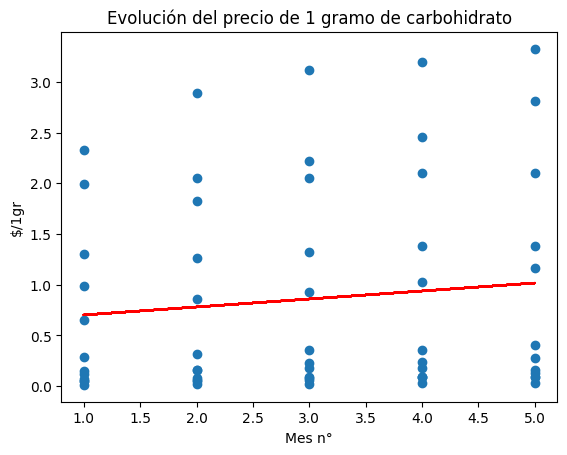

los coeficientes de cuadrados minimos son:  (0.07876874170761257, 0.6222000604507993)


In [27]:
valores_y = valores_precio.tolist()
puntos = [] #encuentro todos los puntos a los que voy a sacar mínimos cuadrados
for i in valores_y:
    for k, j in enumerate(i):
        puntos.append((k+1,j))
def minimosC(puntos):
    listaX  = []
    listaY = []
    for i in puntos:
        listaX.append(i[0])
        listaY.append(i[1])
    
    x = np.array(listaX)
    y = np.array(listaY)
    
    X = np.vstack([x, np.ones(len(x))]).T
    
    X_pseudo_inv = np.linalg.inv(X.T @ X) @ X.T
    solucion = X_pseudo_inv @ y
    m, b = solucion
    #print(f"Pendiente: {m}")
    #print(f"Intersección: {b}")
    x = np.array(listaX)
    y = np.array(listaY)
    #Graficar datos y la línea de ajuste
    plt.plot(x, y, 'o',)
    plt.plot(x, m*x + b, 'r')
    plt.ylabel('$/1gr')
    plt.xlabel('Mes n°')
    plt.show()
    return m,b
plt.title('Evolución del precio de 1 gramo de carbohidrato')
print("los coeficientes de cuadrados minimos son: ",minimosC(puntos))

Gracias al gráfico, se observa que los puntos azules, que representan el precio por gramo, van en aumento a lo largo de los meses. Para valores superiores a 0.0.6222000604507993(coeficiente principal - interseccion), el incremento del precio por gramo es  inregular ya que en cada mes actua de manera distinta. En la parte inferior, aunque se refleja este comportamiento como un espejo, el aumento es mucho más reducido. Podemos considerar que este "espejo" es nuestro cuadrado mínimo (la línea roja), lo cual indica que nuestro gráfico es coherente y va acorde con las expectativas.



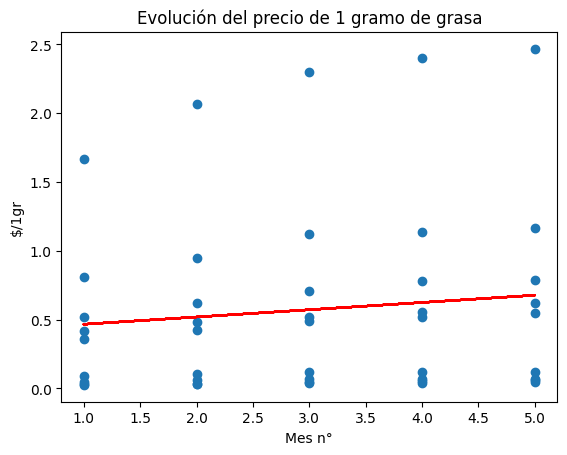

los coeficientes de cuadrados minimos son:  (0.052721577238302876, 0.4136384568419958)


In [28]:
#Repito todo pero con el costo de 1 gramo de Grasa
valores_precio = df_li.iloc[:, 1:].values
valores_precio = np.delete(valores_precio, 11, axis=0)

for i, y in enumerate(valores_precio): 
    valores_precio[i] = valores_precio[i]*cantidadGrasas()[i]
for i,y in enumerate(valores_precio):
    valores_precio[i] = valores_precio[i]/cantidades_li[i] 
df_li_ajustado.fillna(0, inplace=True) #lleno los espacios vacíos
y_values = valores_precio[:, 1:]
dy = pd.DataFrame(y_values)
dy = dy[dy[0] != 0] #sacamos los valores que son 0 para mejorar la precisión 
valores_precio = dy.iloc[:, :].values

valores_y = valores_precio.tolist()
puntos = []
for i in valores_y:
    for k, j in enumerate(i):
        puntos.append((k+1,j))
plt.title('Evolución del precio de 1 gramo de grasa')
print("los coeficientes de cuadrados minimos son: ",minimosC(puntos))

Gracias al gráfico, se observa que los puntos azules, que representan el precio por gramo, van en aumento a lo largo de los meses. A diferencia del gráfico anterior, aquí el aumento del precio por gramo da un salto notable entre 0.7 y 1.6 en el primer mes aproximadamente, caracteristica que se refleja a lo largo de los demas meses con aumentos. Este comportamiento se observa también en su contraparte en espejo que esta reducida, utilizando nuevamente el método de los cuadrados mínimos antes mencionado, agregando que la linea de representacion empieza desde el coeficiente principal de la interseccion 0.4136384568419958 .

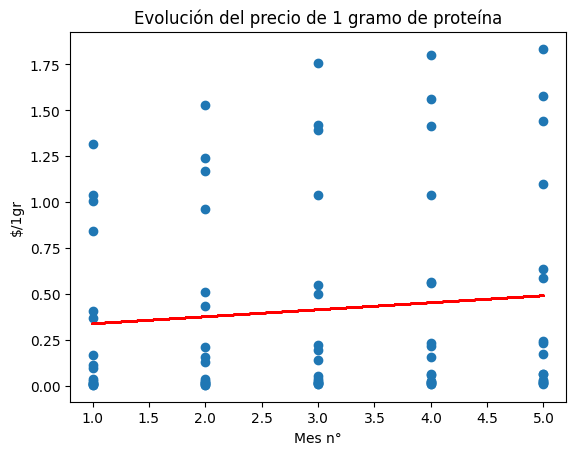

los coeficientes de cuadrados minimos son:  (0.03816919143579981, 0.2988651713101848)


In [29]:
#Repito todo pero con el costo de 1 gramo de Proteina
valores_precio = df_li.iloc[:, 1:].values
valores_precio = np.delete(valores_precio, 11, axis=0)

for i, y in enumerate(valores_precio): 
    valores_precio[i] = valores_precio[i]*cantidadProte()[i]
for i,y in enumerate(valores_precio):
    valores_precio[i] = valores_precio[i]/cantidades_li[i] 
df_li_ajustado.fillna(0, inplace=True) #lleno los espacios vacíos
y_values = valores_precio[:, 1:]
dy = pd.DataFrame(y_values)
dy = dy[dy[0] != 0] #sacamos los valores que son 0 para mejorar la precisión 
valores_precio = dy.iloc[:, :].values

valores_y = valores_precio.tolist()
puntos = []
for i in valores_y:
    for k, j in enumerate(i):
        puntos.append((k+1,j))
plt.title('Evolución del precio de 1 gramo de proteína')
print("los coeficientes de cuadrados minimos son: ",minimosC(puntos))

Gracias al gráfico, se observa que los puntos azules, que representan el precio por gramo, van en aumento a lo largo de los meses. Para valores superiores a 0.2988651713101848( interseccion - coeficiente prinpicipal), el incremento del precio por gramo es notable e inregular ya que en cada mes actua de manera distinta pero con crecimiento constante. En la parte inferior, aunque se refleja este comportamiento como un espejo, el aumento es mucho más reducido. Podemos considerar que este "espejo" es nuestro cuadrado mínimo (la línea roja), lo cual indica que nuestro gráfico es coherente y va acorde con las expectativas.

En todos los graficos se presenta un aumento, uno mas que otros pero siempre es una constante, se tiene en cuenta que los graficos  en su eje Y marca valores diferentes aproximados: (0,3),(0,2.5),(0,1.75)

In [30]:
tabla_coeficientes = pd.DataFrame({
    'Nutriente': ['Carbohidratos', 'Grasas', 'Proteínas'],
    'Pendiente (m)': [0.07876874170761257,0.052721577238302876, 0.03816919143579981],
    'Intersección (b)': [0.6222000604507993, 0.4136384568419958, 0.298865171310184]
})

tabla_coeficientes

,Nutriente,Pendiente (m),Intersección (b)
0,Carbohidratos,0.078769,0.622200
1,Grasas,0.052722,0.413638
2,Proteínas,0.038169,0.298865


Segun la pendiente vista de forma numerica podemos entender como en el grafico de cuadrado minimo abarca mucho mas en los carbohidratos a diferencias de las grasas en segundo lugar y las proteinas donde su aumento es menor

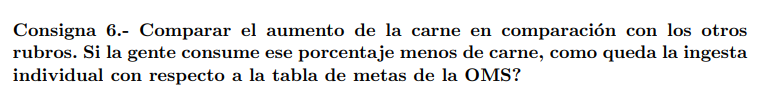

In [31]:
cantidades = df_li.iloc[:,1:2].values
df_li_por_gramo = df_li.copy()
for columna in range(2,len(df_li_por_gramo.columns)):
    for i in range(len(df_li_por_gramo[df_li_por_gramo.columns[columna]])):
        df_li_por_gramo[df_li_por_gramo.columns[columna]][i] = df_li_por_gramo[df_li_por_gramo.columns[columna]][i]/cantidades[i]

In [32]:
carne = ['BOLA DE LOMO', 'ASADO', 'PALETA', 'CARNE PICADA COMUN']
almacen = ["ACEITE COCINERO GIRASOL", "ARROZ GRANO FINO", "AZUCAR LEDESMA", "FIDEOS GUISEROS", "HARINA DE TRIGO", "HUEVOS COLOR DOCENA", "PAN FRESCO", "LECHE c/VIT.FORT", "YERBA TARAGUI"]
frutaYverdura = ["ZANAHORIAS", "TOMATE PERITA", "CEBOLLA", "PAPA NEGRA", "ACELGA PAQUETE", "NARANJA", "MANZANA"]

# Filtrar el DataFrame para solo incluir productos de carne

df_carne = df_li_por_gramo[df_li_por_gramo['PRODUCTOS'].isin(carne)].iloc[:,:]

# Filtrar el DataFrame para incluir productos de almacen
df_almacen = df_li_por_gramo[df_li_por_gramo['PRODUCTOS'].isin(almacen)].iloc[:,:]
#Lo mismo con las frutas y verduras
df_frut = df_li_por_gramo[df_li_por_gramo['PRODUCTOS'].isin(frutaYverdura)].iloc[:,:]

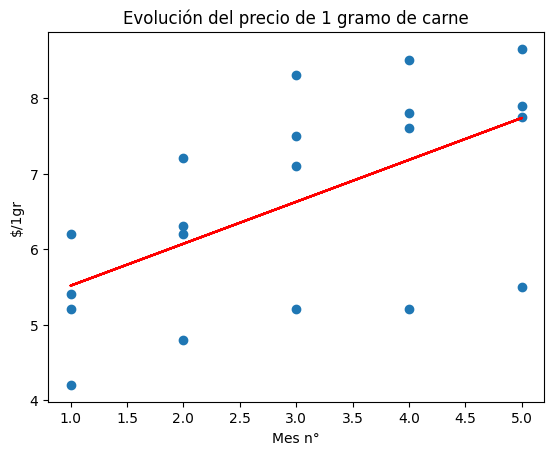

los coeficientes de cuadrados minimos son:  (0.5549999999999999, 4.9600000000000035)


In [33]:
# Obtenemos las fechas como etiquetas para el eje x (desde la segunda columna hasta la última)
fechas = df_carne.columns[2:]

# Lo mismo los precios como valores para el eje y (desde la segunda columna hasta la última)
precios = df_carne.iloc[:, 2:].to_numpy()

# Visualizamos usando plt.scatter
valores_y = precios.tolist()
puntos = []
for i in valores_y:
    for k, j in enumerate(i):
        puntos.append((k+1,j))
plt.title('Evolución del precio de 1 gramo de carne')
print("los coeficientes de cuadrados minimos son: ",minimosC(puntos))

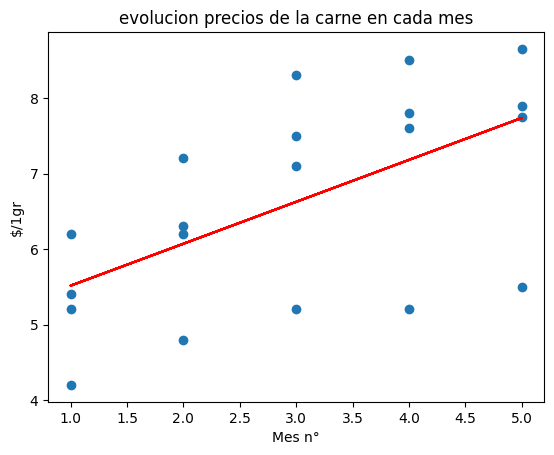

los coeficientes de cuadrados minimos son:  (0.5549999999999999, 4.9600000000000035)


In [34]:
# Obtenemos las fechas como etiquetas para el eje x (desde la segunda columna hasta la última)
fechas_carne = df_carne.columns[2:]
fechas_almacen = df_almacen.columns[2:]
fechas_frut = df_frut.columns[2:]

# Lo mismo con los precios como valores para el eje y (desde la segunda columna hasta la última)
precios_carne = df_carne.iloc[:, 2:].to_numpy()
precios_almacen = df_almacen.iloc[:, 2:].to_numpy()
precios_frut = df_frut.iloc[:,2:].to_numpy()

valores_y = precios_carne.tolist()
puntos = []
for i in valores_y:
    for k, j in enumerate(i):
        puntos.append((k+1,j))
plt.title("evolucion precios de la carne en cada mes")
print("los coeficientes de cuadrados minimos son: ",minimosC(puntos))

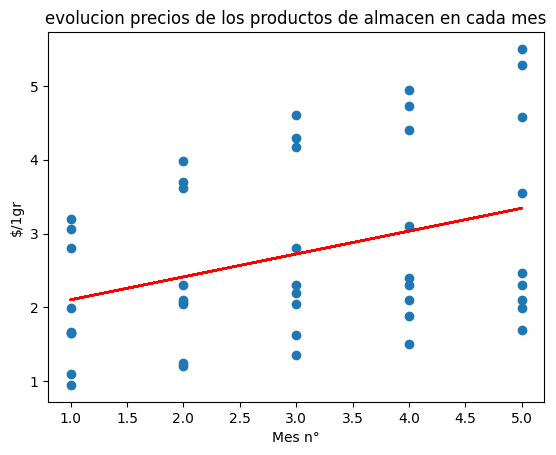

los coeficientes de cuadrados minimos son:  (0.30976543209876617, 1.7936666666666659)


In [35]:
valores_y = precios_almacen.tolist()
puntos = []
for i in valores_y:
    for k, j in enumerate(i):
        puntos.append((k+1,j))
plt.title("evolucion precios de los productos de almacen en cada mes")
print("los coeficientes de cuadrados minimos son: ",minimosC(puntos))

In [36]:
"""Se puede apreciar debajo de cada gráfico el coeficiente principal de la recta, acompañado de el término independiente. El coeficiente principal de las carnes es 0.555, el de productos de almacen es de 0.301 y el de frutas y verduras es de 0.251. Con esa información podemos apreciar claramente que el incremento de la carne fue ampliamente superior al de los otros dos rubros"""

'Se puede apreciar debajo de cada gráfico el coeficiente principal de la recta, acompañado de el término independiente. El coeficiente principal de las carnes es 0.555, el de productos de almacen es de 0.301 y el de frutas y verduras es de 0.251. Con esa información podemos apreciar claramente que el incremento de la carne fue ampliamente superior al de los otros dos rubros'

In [37]:
#Buscamos como quedaría la ingesta individual respecto a las metas de la OMS si la gente consumiera 21.63% menos de carne
df_menos_carne = df.copy()
nuevas_cantidades = []
indices_carne = [7,8,10,11]
for i,y in enumerate(df["Cantidad (gr/ml)"]):
    #print(i,y)
    if i in indices_carne: #si es una carne le agrego solo el 78.37% de esa cantidad
        nuevas_cantidades.append(y*0.7837)
    else: #sino le agrego la cantidad completa
        nuevas_cantidades.append(y)
df_menos_carne["Cantidad (gr/ml))"] = nuevas_cantidades
comidaSana(df_menos_carne)


hay un 4.05% de grasas lo cual es insuficiente
hay un 5.92% de proteínas lo cual es insuficiente
hay 3.34 gramos de sodio lo cual es excesivo
hay un 21.61% de carbohidratos lo cual es insuficiente
hay un 2.99% de azucares libres lo cual es adecuado
hay 21.26 gramos de Fibra lo cual es insuficiente
hay 665.0 gramos de Fruta y verdura lo cual es adecuado
Despues de evaluar si cumple los margenes de la ingesta de OMS la respuesta es: False


In [38]:
"""Así como antes no se llegaba a las metas, ahora que se consume menos carne (por ende menos proteínas y menos grasas) estamos aún más lejos de llegar a cumplirlas"""

'Así como antes no se llegaba a las metas, ahora que se consume menos carne (por ende menos proteínas y menos grasas) estamos aún más lejos de llegar a cumplirlas'

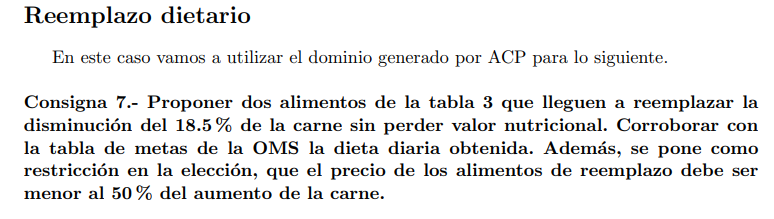

In [39]:

carne = ['BOLA DE LOMO', 'ASADO', 'PALETA', 'CARNE PICADA COMUN']
# Filtrar el DataFrame para solo incluir productos de carne
df_carne = df_li[df_li['PRODUCTOS'].isin(carne)].iloc[:,:]
# Filtrar el DataFrame para incluir productos que no son carne
df_no_carne = df_li[~df_li['PRODUCTOS'].isin(carne)].iloc[:,:]


carne1 = ['Bola de Lomo', 'Asado', 'Paleta ', 'Carne picada']
df_carne_nutricion = df.copy()
df_carne_nutricion = df_carne_nutricion[df_carne_nutricion['Alimento'].isin(carne1)].iloc[:,:]
df_no_nutri_carne = df.copy()
df_no_nutri_carne = df_no_nutri_carne[~df_no_nutri_carne['Alimento'].isin(carne1)].iloc[:,:]


- Cargo el dataframe consumidores libres
- Hago 2 dataframe distintos con las carnes a evaluar utilizando la tabla de consumidores libres
- Hago 2 dataframes distintos con las carnes a evaluar utilizando la tabla de nutricion para utilizar mas adelante

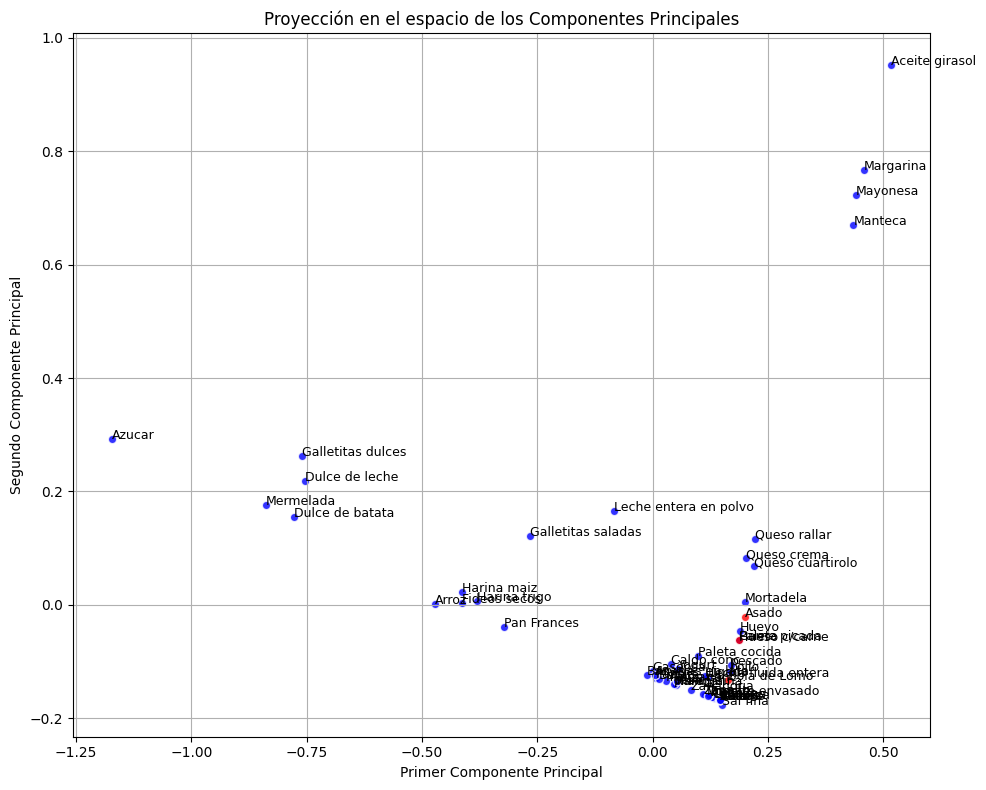

In [40]:
D, V, X, m = calculoACP(valores_nutricionales)
alimentos_tabla_con_li = ['Bola de Lomo',
                          'Asado', 'Paleta ', 'Carne picada']
X_pca = np.dot(X, V[:, :3]) 
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
for i, alimento in enumerate(df['Alimento']):
    if alimento in carne1:
        ax.scatter(X_pca[i, 0], X_pca[i, 1], color='red', alpha=0.8, edgecolors='w')
    else:
        ax.scatter(X_pca[i, 0], X_pca[i, 1], color='blue', alpha=0.8, edgecolors='w')

   
    ax.text(X_pca[i, 0], X_pca[i, 1], alimento, fontsize=9)
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('Proyección en el espacio de los Componentes Principales') 
ax.grid(True)
plt.tight_layout()
plt.show()

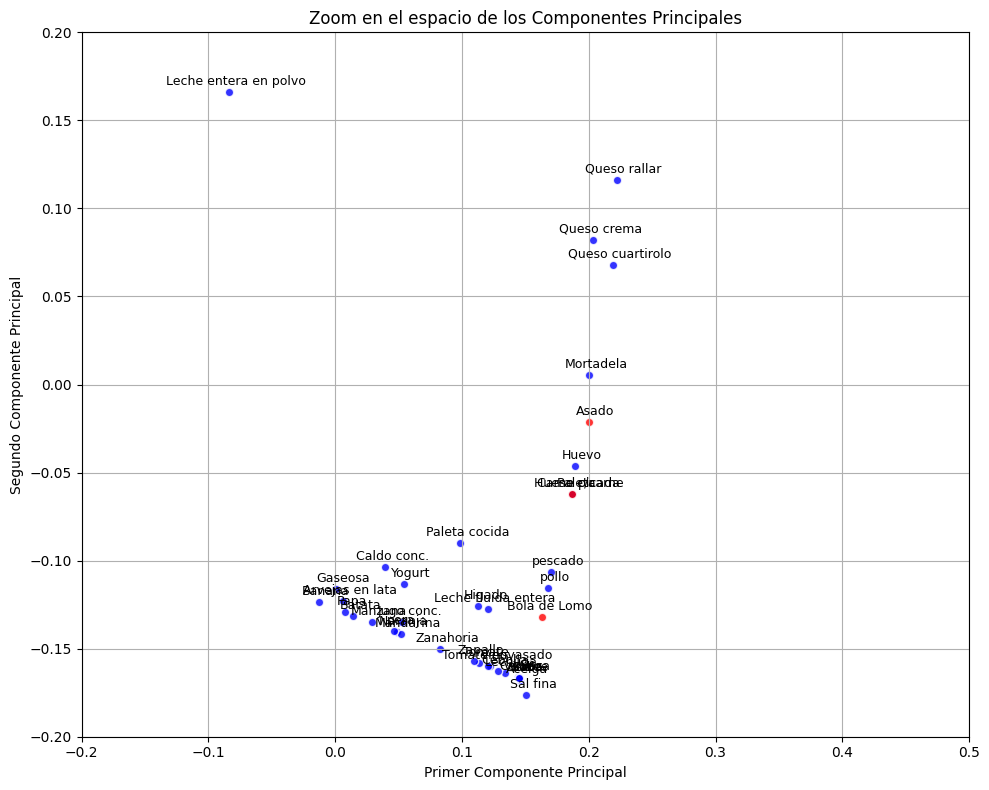

In [41]:
X_pca = np.dot(X, V[:, :3]) 
mask = (X_pca[:, 0] >= -0.2) & (X_pca[:, 0] <= 0.5) & (X_pca[:, 1] >= -0.2) & (X_pca[:, 1] <= 0.2)
X_pca_zoomed = X_pca[mask]
alimentos_zoomed = df[mask]['Alimento'].tolist()  
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
for i, alimento in enumerate(df['Alimento']):
    if alimento in alimentos_tabla_con_li and alimento in alimentos_zoomed:
        color = 'red' 
    else:
        color = 'blue'   
    if alimento in alimentos_zoomed:
        ax.scatter(X_pca[i, 0], X_pca[i, 1], color=color, alpha=0.8, edgecolors='w')
        ax.annotate(alimento, (X_pca[i, 0], X_pca[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=9)
ax.set_xlim(-0.2, 0.5)
ax.set_ylim(-0.2, 0.2)
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('Zoom en el espacio de los Componentes Principales') 
ax.grid(True) 
plt.tight_layout()
plt.show()

# Análisis de Alimentos con Zoom en Gráficos

Con los diferentes gráficos (que solo se diferencian en hacer ZOOM) que provienen del ejercicio 2, puedo ver que alimentos se parecen entre sí segun su valor nutricional. De esta manera, puedo darme una idea de cuáles se parecen en valores nutricionales, haciendo un énfasis importante en proteínas como lo mas destacados de las carnes.

## Selección de Alimentos

- Los alimentos que debo elegir deben estar en la tabla de consumidores libres.
- Elijo Pan Francés (que es pan fresco en la tabla de consumidores libres) y Huevo, debido a la cercanía al clúster de carnes que tienen ambas.


### Reviso la condicion que estos dos alimentos deben ser menor al 50% de aumento de carne

In [42]:
df_carne['Aumento ($)'] = df_carne['30/4/2024'] - df_carne['31/12/2023']
print(df_carne[['PRODUCTOS', 'Aumento ($)']])

             PRODUCTOS  Aumento ($)
17        BOLA DE LOMO       2450.0
18               ASADO       2350.0
19              PALETA       2700.0
20  CARNE PICADA COMUN       1300.0


In [43]:
df_no_carne['Aumento ($)'] = df_no_carne['30/4/2024'] - df_no_carne['31/12/2023']
print(df_no_carne[['PRODUCTOS', 'Aumento ($)']])

                  PRODUCTOS  Aumento ($)
0   ACEITE COCINERO GIRASOL       1200.0
1          ARROZ GRANO FINO       1900.0
2            AZUCAR LEDESMA        110.0
3           FIDEOS GUISEROS        690.0
4           HARINA DE TRIGO        740.0
5       HUEVOS COLOR DOCENA       1600.0
6                PAN FRESCO        650.0
7          LECHE c/VIT.FORT        890.0
8             YERBA TARAGUI       2700.0
9                ZANAHORIAS        280.0
10               BERENJENAS       2000.0
11            TOMATE PERITA       1500.0
12                  CEBOLLA       1000.0
13               PAPA NEGRA         50.0
14           ACELGA PAQUETE       1540.0
15                  NARANJA       1280.0
16                  MANZANA        800.0



### Incremento de Carnes

El aumento de carnes es la suma de:
- 2450
- 2350
- 2700
- 1300

Total: 
\[ 2450 + 2350 + 2700 + 1300 = 8800 \]

### Incremento de Huevo

El aumento de huevo es:
\[ 1600 \]

### Incremento de Pan Fresco (Pan Francés)

El aumento de Pan Fresco es:
\[ 650 \]

## Cálculo de Porcentajes

### Comparación del Incremento de Huevo con Carnes

- 8800 -- 100%
- 1600 -- 18.18\%


### Comparación del Incremento de Pan Fresco con Carnes

- 8800 -- 100%
- 650 --  7.39\%

 

### Suma de Incrementos de Huevo y Pan Fresco

Sumando ambos incrementos:
\[ 1600 + 650 = 2250 \]

- 8800 -- 100%
- 2250 -- 25.57\% 

### Cumplen lo pedido.


### Consideraciones de Pérdida sobre la Carne

1) - **Total de proteínas** original: 24.91 g
  - Total de proteínas después de quedarme con el 81%: 20.30165 g
  - Pérdida de proteínas: 4.60835 g

2) - **Total de grasas** original: 12.18 g
  - Total de grasas después de quedarme con el 81%: 9.9267 g
  - Pérdida de grasas: 2.2533 g

3) - **Total de carbohidratos** original: 0 g
  - Total de carbohidratos después de quedarme con el 81%: 0 g
  - Pérdida de carbohidratos: 0 g

Debido a la importancia de estos datos que caracteriza a la carne y su pérdida, basaré mis datos de alimentos elegidos (pan francés y huevos) a través de la **proteína** ya que es lo que más se necesita. Después mostrare cuanto de cantidad se añadio a la tabla


## Dieta daria obtenida: 

In [44]:
#Dividimos en dos listas las columnas a utilizar en las siguientes funciones
 
columnas_nutricionales = [
    'HC (gr)', 'Proteinas (gr)', 'Grasas (gr)', 'Na (gr)', 'Ca (gr)', "Fe (gr)",
    'Azucares Libres (gr)', 'AGS (gr)', 'AGNI (gr)', 'AG p (gr)', 'Fibra (gr)'
]

columnas_nutricionales_apartir_proteinas = [
    "Cantidad (gr/ml)",'HC (gr)', 'Grasas (gr)', 'Na (gr)', 'Ca (gr)', "Fe (gr)", 
    'Azucares Libres (gr)', 'AGS (gr)', 'AGNI (gr)', 'AG p (gr)', 'Fibra (gr)'
]

In [45]:
df_punto7 = df.copy()
# Iterar sobre los alimentos a modificar de carne para sacar el 18,5%

cantidad_original_proteina = 0
for alimento in carne1:
    #Guardamos la cantidad de proteina original para utilizarla mas adelante
    cantidad_original_proteina += df_punto7.loc[df_punto7['Alimento'] == alimento, 'Proteinas (gr)'].values[0]
    
    
    cantidad_original = df_punto7.loc[df_punto7['Alimento'] == alimento, 'Cantidad (gr/ml)'].values[0]
    cantidad_nueva = cantidad_original * (1 - 0.185)
    # Calcular el factor de ajuste
    factor_ajuste = cantidad_nueva / cantidad_original
    # Actualizar la cantidad en el DataFrame
    df_punto7.loc[df_punto7['Alimento'] == alimento, 'Cantidad (gr/ml)'] = cantidad_nueva
    # Actualizar los valores nutricionales proporcionalmente
    df_punto7.loc[df_punto7['Alimento'] == alimento, columnas_nutricionales] *= factor_ajuste



#Revisamos la cantidad de proteina obtenida
cantidad_proteina_actual = 0
for alimento in carne1:
    cantidad_proteina_actual +=  df_punto7.loc[df_punto7['Alimento'] == alimento, 'Proteinas (gr)'].values[0]

#Nos quedamos con la diferencia de la  proteina original y proteina actual
cantidad_proteinas_agregar = cantidad_original_proteina - cantidad_proteina_actual

#Sumamos la proteina faltante al alimento que seleccionamos
pro_original = df_punto7.loc[df_punto7['Alimento'] == 'Huevo', 'Proteinas (gr)'].values[0]
df_punto7.loc[df_punto7['Alimento'] == 'Huevo', 'Proteinas (gr)'] = pro_original + cantidad_proteinas_agregar
cantidad_actualizada_proteinas = pro_original+ cantidad_proteinas_agregar


valores_nutricionales_ali = df_punto7.loc[df_punto7['Alimento'] == 'Huevo', columnas_nutricionales_apartir_proteinas].values[0]

# Verifica si alguno de los valores es 0
if (valores_nutricionales_ali == 0).any():
    df_punto7.loc[df_punto7['Alimento'] == 'Huevo', columnas_nutricionales_apartir_proteinas] *= cantidad_actualizada_proteinas
else:
    df_punto7.loc[df_punto7['Alimento'] == 'Huevo', columnas_nutricionales_apartir_proteinas] *= (cantidad_actualizada_proteinas / pro_original)


#Revisamos la dieta diaria obtenida segun la evaluacion de la OMS
comidaSana(df_punto7)

 

hay un 4.34% de grasas lo cual es insuficiente
hay un 5.73% de proteínas lo cual es insuficiente
hay 3.44 gramos de sodio lo cual es excesivo
hay un 20.9% de carbohidratos lo cual es insuficiente
hay un 2.89% de azucares libres lo cual es adecuado
hay 21.26 gramos de Fibra lo cual es insuficiente
hay 665.0 gramos de Fruta y verdura lo cual es adecuado
Despues de evaluar si cumple los margenes de la ingesta de OMS la respuesta es: False


### Información del Huevo

- **Cantidad Original**: 16.0 gr/ml
- **Cantidad Actual**: 46.703 gr/ml
- **Aumento**: 30.704 gr/ml



In [46]:
df_punto7 = df.copy()

cantidad_original_proteina = 0
for alimento in carne1:
     #Guardamos la cantidad de proteina original para utilizarla mas adelante
    cantidad_original_proteina += df_punto7.loc[df_punto7['Alimento'] == alimento, 'Proteinas (gr)'].values[0]
    
    
    cantidad_original = df_punto7.loc[df_punto7['Alimento'] == alimento, 'Cantidad (gr/ml)'].values[0]
    cantidad_nueva = cantidad_original * (1 - 0.185)

   
    factor_ajuste = cantidad_nueva / cantidad_original    
    df_punto7.loc[df_punto7['Alimento'] == alimento, 'Cantidad (gr/ml)'] = cantidad_nueva
    df_punto7.loc[df_punto7['Alimento'] == alimento, columnas_nutricionales] *= factor_ajuste


cantidad_proteina_actual = 0
for alimento in carne1:
    cantidad_proteina_actual +=  df_punto7.loc[df_punto7['Alimento'] == alimento, 'Proteinas (gr)'].values[0]
    
cantidad_proteinas_agregar = cantidad_original_proteina - cantidad_proteina_actual

pro_original = df_punto7.loc[df_punto7['Alimento'] == 'Pan Frances', 'Proteinas (gr)'].values[0]
df_punto7.loc[df_punto7['Alimento'] == 'Pan Frances', 'Proteinas (gr)'] = pro_original + cantidad_proteinas_agregar
cantidad_actualizada_proteinas = pro_original + cantidad_proteinas_agregar


valores_nutricionales_ali = df_punto7.loc[df_punto7['Alimento'] == 'Pan Frances', columnas_nutricionales_apartir_proteinas].values[0]

# Verifica si alguno de los valores es 0
if (valores_nutricionales_ali == 0).any():
    df_punto7.loc[df_punto7['Alimento'] == 'Pan Frances', columnas_nutricionales_apartir_proteinas] *= cantidad_actualizada_proteinas
else:
    df_punto7.loc[df_punto7['Alimento'] == 'Pan Frances', columnas_nutricionales_apartir_proteinas] *= (cantidad_actualizada_proteinas / pro_original)


comidaSana(df_punto7)

hay un 0.91% de grasas lo cual es insuficiente
hay un 1.37% de proteínas lo cual es insuficiente
hay 11.92 gramos de sodio lo cual es excesivo
hay un 51.28% de carbohidratos lo cual es insuficiente
hay un 0.69% de azucares libres lo cual es adecuado
hay 191.95 gramos de Fibra lo cual es adecuado
hay 665.0 gramos de Fruta y verdura lo cual es adecuado
Despues de evaluar si cumple los margenes de la ingesta de OMS la respuesta es: False


### Información del Pan Frances

- **Cantidad Original**: 234.0 gr/ml
- **Cantidad Actual**: 5709.366 gr/ml
- **Aumento**: 5475.366 gr/ml

- Debido a que los alimentos elegidos son cercanos, segun el ACP a los valores nutricionales de la carne
y tienen una cantidad decente de proteinas(se puede ver en la tabla original), hay pocos cambios en rasgo generales  de los resultados obtenidos
por la verificiacion de dieta de la OMS.

- Siendo mas especifico en los cambios, en el huevo son muy minimos, pero en el pan Frances en la seccion de fibras,  se esperaba
  un resultado aproximado al 21.26gramos(datos originales de la tabla sin modificar) pero obtuvo 191.95gramos, un aumento sustancial que llevo a marcala como cantidad adecuada de fibra(que originalmente la OMS lo marcaba como insuficiente)
  


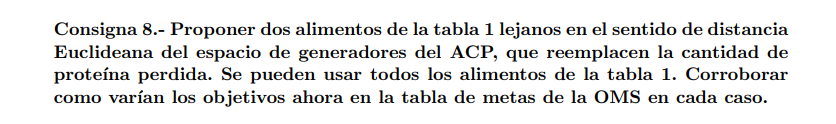


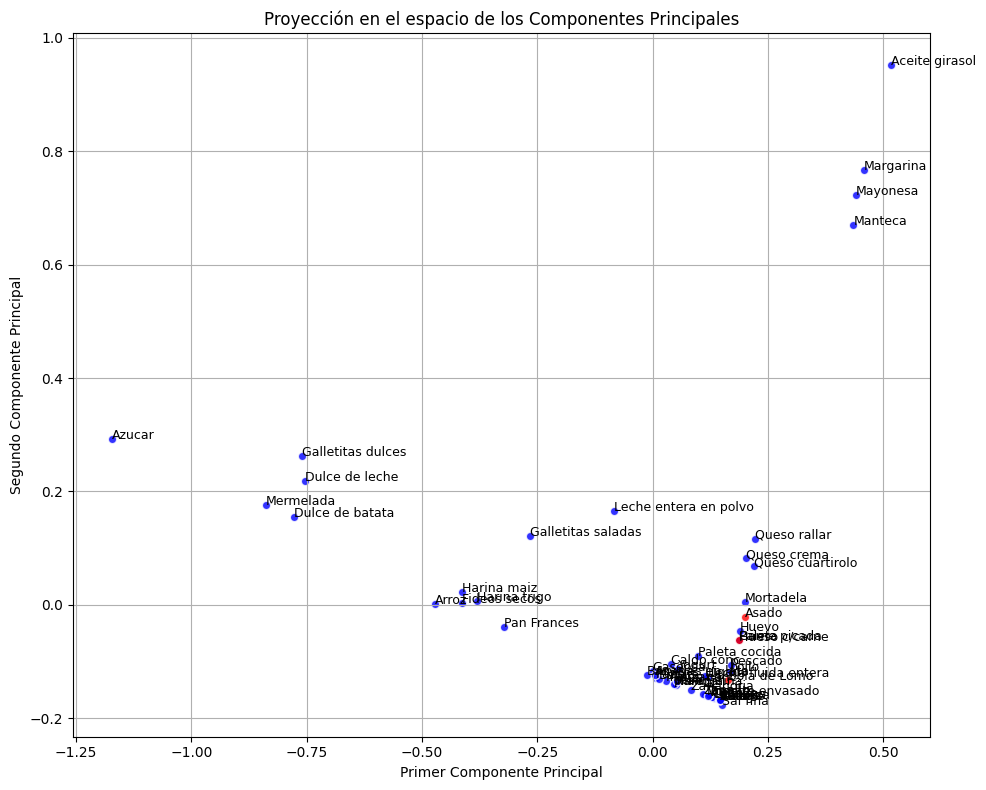

In [47]:
#Primero hacemos una visualizacion para ver que alimentos elegir.


D, V, X, m = calculoACP(valores_nutricionales)
alimentos_tabla_con_li = ['Bola de Lomo',
                          'Asado', 'Paleta ', 'Carne picada']

X_pca = np.dot(X, V[:, :3]) 

plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
for i, alimento in enumerate(df['Alimento']):
    if alimento in alimentos_tabla_con_li:
        ax.scatter(X_pca[i, 0], X_pca[i, 1], color='red', alpha=0.8, edgecolors='w')
    else:
        ax.scatter(X_pca[i, 0], X_pca[i, 1], color='blue', alpha=0.8, edgecolors='w')

    ax.text(X_pca[i, 0], X_pca[i, 1], alimento, fontsize=9)
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('Proyección en el espacio de los Componentes Principales')
ax.grid(True)
plt.tight_layout()
plt.show()

In [48]:
#Elegimos Aceite de girasol
df_punto8 = df.copy()

cantidad_original_proteina = 0
for alimento in carne1:
     #Guardamos la cantidad de proteina original para utilizarla mas adelante
    
    
    cantidad_original_proteina += df_punto8.loc[df_punto8['Alimento'] == alimento, 'Proteinas (gr)'].values[0]
    
    cantidad_original = df_punto8.loc[df_punto8['Alimento'] == alimento, 'Cantidad (gr/ml)'].values[0]
    cantidad_nueva = cantidad_original * (1 - 0.185)

    factor_ajuste = cantidad_nueva / cantidad_original
    df_punto8.loc[df_punto8['Alimento'] == alimento, 'Cantidad (gr/ml)'] = cantidad_nueva
    df_punto8.loc[df_punto8['Alimento'] == alimento, columnas_nutricionales] *= factor_ajuste



cantidad_proteina_actual= 0
for alimento in carne1:
    cantidad_proteina_actual +=  df_punto8.loc[df_punto8['Alimento'] == alimento, 'Proteinas (gr)'].values[0]
    
cantidad_proteinas_agregar = cantidad_original_proteina - cantidad_proteina_actual


pro_original = df_punto8.loc[df_punto8['Alimento'] == 'Aceite girasol', 'Proteinas (gr)'].values[0]
df_punto8.loc[df_punto8['Alimento'] == 'Aceite girasol', 'Proteinas (gr)'] = pro_original + cantidad_proteinas_agregar
cantidad_actualizada_proteinas = pro_original + cantidad_proteinas_agregar

valores_nutricionales_ali = df_punto8.loc[df_punto8['Alimento'] == 'Aceite girasol', columnas_nutricionales_apartir_proteinas].values[0]

# Verifica si alguno de los valores es 0
if (valores_nutricionales_ali == 0).any():
    df_punto8.loc[df_punto8['Alimento'] == 'Aceite girasol', columnas_nutricionales_apartir_proteinas] *= cantidad_actualizada_proteinas
else:
    df_punto8.loc[df_punto8['Alimento'] == 'Aceite girasol', columnas_nutricionales_apartir_proteinas] *= (cantidad_actualizada_proteinas / pro_original)

 

comidaSana(df_punto8)

hay un 9.88% de grasas lo cual es insuficiente
hay un 5.63% de proteínas lo cual es insuficiente
hay 3.32 gramos de sodio lo cual es excesivo
hay un 20.54% de carbohidratos lo cual es insuficiente
hay un 2.84% de azucares libres lo cual es adecuado
hay 21.26 gramos de Fibra lo cual es insuficiente
hay 665.0 gramos de Fruta y verdura lo cual es adecuado
Despues de evaluar si cumple los margenes de la ingesta de OMS la respuesta es: False


### Información del Aceite girasol

- **Cantidad Original**: 34.0 gr/ml
- **Cantidad Actual**: 156.6839	gr/ml
- **Aumento**: 122.6839 gr/ml

In [49]:
#Elegimos Galletita saladas
df_punto8 = df.copy()

cantidad_original_proteina = 0
for alimento in carne1:
    cantidad_original_proteina += df_punto8.loc[df_punto8['Alimento'] == alimento, 'Proteinas (gr)'].values[0]
    cantidad_original = df_punto8.loc[df_punto8['Alimento'] == alimento, 'Cantidad (gr/ml)'].values[0]
    cantidad_nueva = cantidad_original * (1 - 0.185)
    factor_ajuste = cantidad_nueva / cantidad_original
    df_punto8.loc[df_punto8['Alimento'] == alimento, 'Cantidad (gr/ml)'] = cantidad_nueva
    df_punto8.loc[df_punto8['Alimento'] == alimento, columnas_nutricionales] *= factor_ajuste



cantidad_proteina_actual=0
for alimento in carne1:
    cantidad_proteina_actual +=  df_punto8.loc[df_punto8['Alimento'] == alimento, 'Proteinas (gr)'].values[0]
    
cantidad_proteinas_agregar = cantidad_original_proteina - cantidad_proteina_actual


pro_original = df_punto8.loc[df_punto8['Alimento'] == 'Galletitas saladas', 'Proteinas (gr)'].values[0]
df_punto8.loc[df_punto8['Alimento'] == 'Galletitas saladas', 'Proteinas (gr)'] = pro_original+ cantidad_proteinas_agregar
cantidad_actualizada_proteinas = pro_original + cantidad_proteinas_agregar



valores_nutricionales_ali = df_punto8.loc[df_punto8['Alimento'] == 'Galletitas saladas', columnas_nutricionales_apartir_proteinas].values[0]

# Verifica si alguno de los valores es 0
if (valores_nutricionales_ali == 0).any():
    df_punto8.loc[df_punto8['Alimento'] == 'Galletitas saladas', columnas_nutricionales_apartir_proteinas] *= cantidad_actualizada_proteinas
else:
    df_punto8.loc[df_punto8['Alimento'] == 'Galletitas saladas', columnas_nutricionales_apartir_proteinas] *= (cantidad_actualizada_proteinas / pro_original)



comidaSana(df_punto8)

hay un 4.39% de grasas lo cual es insuficiente
hay un 5.78% de proteínas lo cual es insuficiente
hay 3.55 gramos de sodio lo cual es excesivo
hay un 23.25% de carbohidratos lo cual es insuficiente
hay un 2.92% de azucares libres lo cual es adecuado
hay 22.65 gramos de Fibra lo cual es insuficiente
hay 665.0 gramos de Fruta y verdura lo cual es adecuado
Despues de evaluar si cumple los margenes de la ingesta de OMS la respuesta es: False


### Información de Galletitas saladas

- **Cantidad Original**: 13.0 gr/ml
- **Cantidad Actual**: 82.65855	gr/ml
- **Aumento**: 69.65855 gr/ml

# Análisis de Aceite de Girasol y Galletitas Saladas

Elegí aceite de girasol y galletitas saladas, que son alimentos con cierta lejanía (una más que otra) de la carne, para ver cómo le afecta a la dieta asignada por la OMS.

## Observaciones

- En el aceite no afecta el resultado de la OMS y es muy similar a numeros de % y gramos a la original, pero en grasa casi se aproxima al 10% que a diferencia del original que ronda al 4%.
- En la galletita salada  no afecta el resultado de la OMS y es mucho mas similar a numeros de %  y grasas a la original que en el aceite,
   solo se aumenta un 2% los carbohidratos de la original pero aun siendo insuficiente en ambas.
- Mi conclucion es que la lejania segun el grafico ACP, demuestra diferentes tipos de variables que tienen los alimentos, que al momento de sustituir a la carne, terminan floreciendo ciertas de sus caracteristicas